In [1]:
using StatsBase
using Plots

In [2]:
function initialstate(L::Int)
    ρ = zeros(Bool,L,L)
    return ρ
end

function strongnoise(ρ::AbstractMatrix, p::Float64)
    L = size(ρ)[1]
    noise = rand(L,L) .< p
    return ρ .⊻ noise
end

function weaknoise(ρ::AbstractMatrix, p::Float64)
    L = size(ρ)[1]
    noise = rand(L,L) .< p
    for i in 1:L
        for j in 1:L
            if noise[i,j]
                ρ[i,j] = rand(Bool)
            end
        end
    end
    return ρ
end

function magnetization(ρ::AbstractMatrix)
    return 1-2mean(ρ)
end

magnetization (generic function with 1 method)

In [3]:
function MV(ρ::AbstractMatrix)
    L = size(ρ)[1]
    updates = zeros(Bool,L,L)
    for i in 1:L
        for j in 1:L
            vote = ρ[i,j] + ρ[i,mod1(j-1,L)] + ρ[i,mod1(j+1,L)] + ρ[mod1(i-1,L),j] + ρ[mod1(i+1,L),j]
            if vote >= 3
                updates[i,j] = ρ[i,j] != true
            else
                updates[i,j] = ρ[i,j] != false
            end
        end
    end

    return ρ .⊻ updates
end

MV (generic function with 1 method)

In [4]:
function strongdynamics(L::Int, p::Float64)
    T = L^2.17+1
    ρ = initialstate(L)
    for t in 1:T
        ρ = strongnoise(ρ, p)
        ρ = MV(ρ)
    end
    return magnetization(ρ)
end

function weakdynamics(L::Int, p::Float64)
    T = L^2.17+1
    ρ = initialstate(L)
    for t in 1:T
        ρ = weaknoise(ρ, p)
        ρ = MV(ρ)
    end
    return magnetization(ρ)
end

weakdynamics (generic function with 1 method)

In [ ]:
# strongdata = Dict{Tuple{Int,Float64},NTuple{2,Float64}}()
# weakdata = Dict{Tuple{Int,Float64},NTuple{2,Float64}}()

Dict{Tuple{Int64, Float64}, Tuple{Float64, Float64}}()

In [ ]:
# samples = 1000

# for L in 10:10:50
#     for p in 0.0:0.01:0.5
#         M1 = 0.0
#         M2 = 0.0
#         for _ in 1:samples
#             M = strongdynamics(L,p)
#             M1 += M
#             M2 += M^2
#         end
#         strongdata[(L,p)] = (M1/samples, M2/samples)
#     end
# end

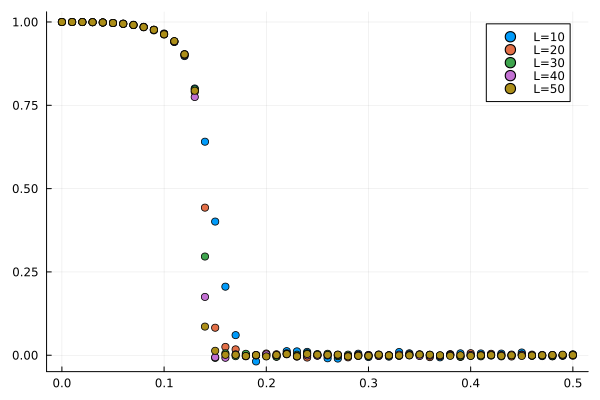

In [19]:
plt = plot()
for L in 10:10:50
    xs = 0.0:0.01:0.5
    ys = [strongdata[(L,p)][1] for p in xs]
    plt = plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

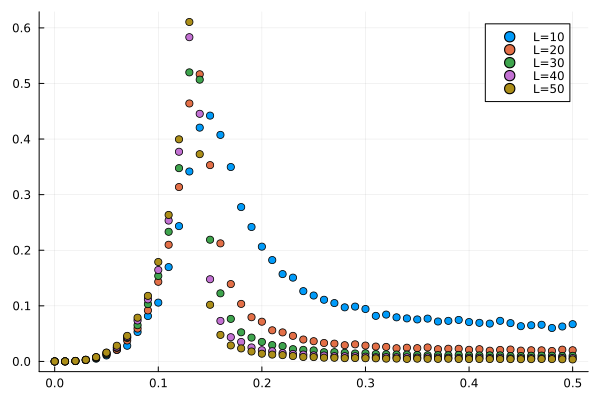

In [14]:
plt = plot()

ν = 1
γ = 7/4

for L in 10:10:50
    xs = 0.0:0.01:0.5
    ys = [strongdata[(L,p)][2]-strongdata[(L,p)][2]^2 for p in xs]
    ys *= L^(2-γ/ν)

    plt = plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

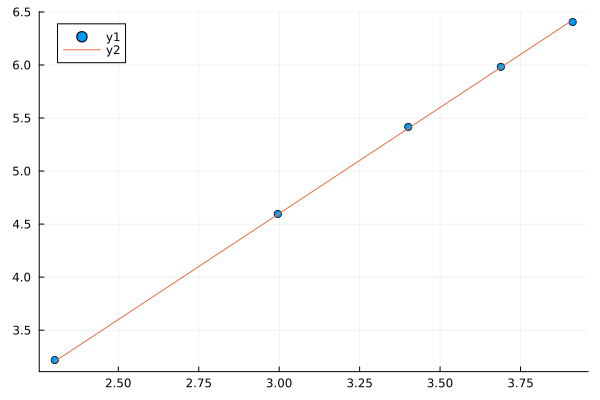

In [181]:
Ls = 10:10:50
ys = [max(L^2*[strongdata[(L,p)][2]-strongdata[(L,p)][2]^2 for p in 0.0:0.01:0.5]...) for L in Ls]

plot(log.(Ls), log.(ys), seriestype=:scatter)

f(x) = 2 * x - 1.4

xs = log(10):0.1:log(50)
ys = f.(xs)
plot!(xs, ys)

In [ ]:
# samples = 1000

# for L in 10:10:50
#     for p in 0.0:0.01:0.5
#         M1 = 0.0
#         M2 = 0.0
#         for _ in 1:samples
#             M = weakdynamics(L,2p)
#             M1 += M
#             M2 += M^2
#         end
#         weakdata[(L,p)] = (M1/samples, M2/samples)
#     end
# end

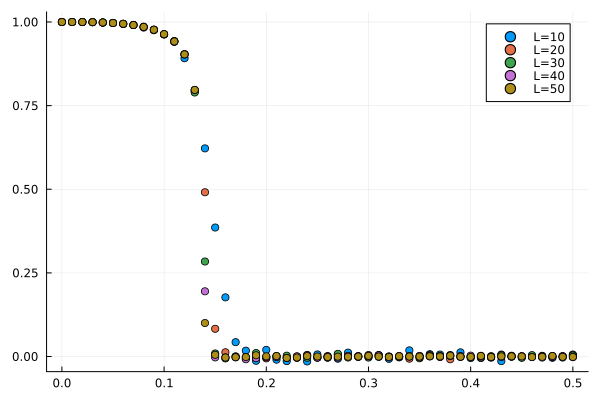

In [17]:
plt = plot()
for L in 10:10:50
    xs = 0.0:0.01:0.5
    ys = [weakdata[(L,p)][1] for p in xs]
    plt = plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

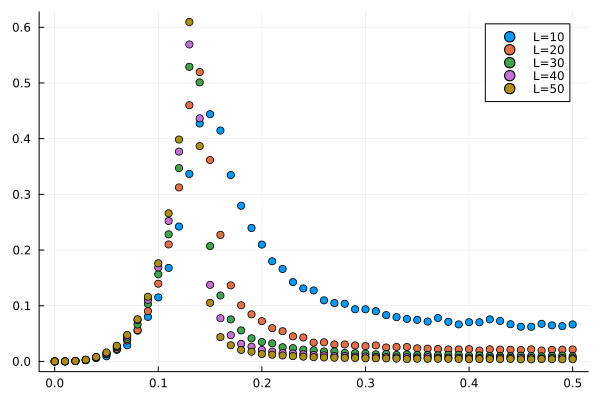

In [16]:
plt = plot()

ν = 1
γ = 7/4

for L in 10:10:50
    xs = 0.0:0.01:0.5
    ys = [weakdata[(L,p)][2]-weakdata[(L,p)][2]^2 for p in xs]
    ys *= L^(2-γ/ν)

    plt = plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

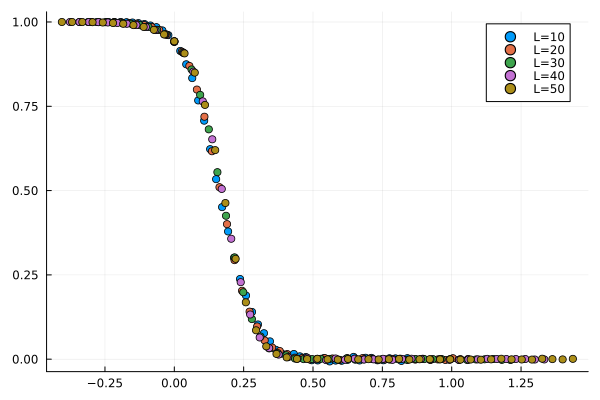

In [153]:
plt = plot()
ν = 3
for L in 10:10:50
    xs = 0.0:0.01:0.5
    ys = [weakdata[(L,p)][1] for p in xs]

    xs = (xs .- 0.11)*L^(1/ν)

    plt = plot!(plt, xs, ys, seriestype=:scatter, label="L=$L")
end
plt

In [ ]:
# try L = 20